# <font color='darkblue'> THE NETWORK OF BEATLES' SONGS

## <font color='darkblue'>Analysis of the network of Beatles'Songs: Getting into their mind

In [138]:
#We import all the necessary packages we used for this project

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ast
import operator
import powerlaw
from fa2 import ForceAtlas2
import re
from urllib.request import urlopen
import urllib.request as urllib2
import os
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import community.community_louvain
import matplotlib.cm as cm

In [2]:
from nltk.corpus import PlaintextCorpusReader
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.text import TextCollection
from matplotlib import cm
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
#Import data

Song_data=pd.read_csv('Songs_Sorted_Years.csv')
Song_data

Song  Year      Month  Day Lyrics
0                      love-me-do  1962    October    5    Yes
1                   ps-i-love-you  1962    October    5    Yes
2                      ask-me-why  1963    January   11    Yes
3                please-please-me  1963    January   11     No
4                     taste-honey  1963      March   22     No
..                            ...   ...        ...  ...    ...
296              you-know-what-do  1995   November   20    Yes
297  you-never-give-me-your-money  1969  September   26    Yes
298                sie-liebt-dich  1964      March    5    Yes
299                     slow-down  1958      March    7     No
300               you-me-too-much  1965     August    6    Yes

[301 rows x 5 columns]

###  <font color='darkblue'>Part 1: Clean Lyrics of Songs.

In [4]:
stop_words = list(set(stopwords.words('english')))
stop_words = [el.replace('\'','') for el in stop_words]
stop_words.append('im')

<font color='darkblue'> A function to **clean the lyrics** is built.

In [5]:
def clean_lyrics(file_path):
    data=open(file_path).read()
    # import WordPunctTokenizer() method from nltk
    # Create a reference variable for Class WordPunctTokenizer
    tk = WordPunctTokenizer()
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # remove punctuation from the string
    no_punct = ""
    for char in data:
        if char not in punctuations:
            no_punct = no_punct + char
    # Remove all the special characters as \n and single = left
    char=['\n','=']
    for el in char:
        raw=re.sub(el,'',no_punct)
    # remove stop words
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_final = [x for x in token_txt if x not in stop_words and len(x)>2]
    return token_final

In [6]:
lyrics_files=[el[:-4] for el in os.listdir('lyrics_songs')]
lyrics_files.remove('.DS_S') # remove this element that is introduced when using os.listdir

In [7]:
file_list = os.listdir("lyrics_songs")
file_list.remove('.DS_Store')

for file in lyrics_files:
    path='lyrics_songs/'+file+'.txt'
    clean=clean_lyrics(path)
    file=open('clean_lyrics/'+file+'.txt','w+')
    for word in clean:
        file.write(word+' ')
    file.close()

In [8]:
corpus = PlaintextCorpusReader('clean_lyrics',file_list)
corpus

<PlaintextCorpusReader in '/Users/lluiscolomercoll/Documents/GitHub/SocialGraphs-Project/clean_lyrics'>

###  <font color='darkblue'>Part 2: Build the Network.

In [9]:
def tc(corpus):
    """ Calculates the term count for each word """
    tc_dict = {}
    for song in corpus.fileids():
        text = nltk.Text(corpus.words(song))
        tc_dict[song[:-4]] = dict(FreqDist(text))
    return tc_dict

def idf(corpus):
    """ Calculates the IDF for each word in the corpus"""
    text = TextCollection(corpus)
    idf_dict = {}
    for word in set(corpus.words()):
        idf_dict[word] = text.idf(word)
    return idf_dict

def tc_idf(corpus):
    """ Calculates the TC-IDF for each word in the corpus, and returns it as a dictionary """
    tc_dict = tc(corpus)
    idf_dict = idf(corpus)
    tc_idf_dict = {}
    songs = list(tc_dict.keys())
    for song in songs:
        tc_idf_dict[song] = {}
        for key, value in tc_dict[song].items():
            tc_idf_dict[song][key] = value * idf_dict[key]
    return tc_idf_dict

We save the tc-idf values of the corpus as a dict, and we order each song from the lower to the higher tc-idf value

In [10]:
tc_idf_dict=tc_idf(corpus)
for el in tc_idf_dict:
    tc_idf_dict[el]=sorted(tc_idf_dict[el].items(), key=lambda item: item[1])

We save the top 5 words for each song according to the tc-idf score

In [11]:
tc_idf_top5={}
for el in tc_idf_dict:
    tc_idf_top5[el]=[word[0] for word in tc_idf_dict[el][-2:]]

Now let's create a dictionary to store the links

In [12]:
lyrics_files

['yesterday',
 'youve-got-hide-your-love-away',
 'got-get-you-my-life',
 'i-need-you',
 'one-after-909',
 'us-you',
 'if-i-fell',
 'it-wont-be-long',
 'youre-going-lose-girl',
 'you-know-what-do',
 'eight-days-week',
 'me-you',
 'everybodys-got-something-hide-except-me-and-my-monkey',
 'because',
 'her-majesty',
 'maggie-mae',
 'piggies',
 'im-only-sleeping',
 'get-back',
 'komm-gib-mir-deine-hand',
 'im-loser',
 'what-goes',
 'fixing-hole',
 'when-i-get-home',
 'here-there-and-everywhere',
 'im-down',
 'every-little-thing',
 'youll-be-mine',
 'come-together',
 'martha-my-dear',
 'ill-cry-instead',
 'ill-follow-sun',
 'ticket-ride',
 'only-northern-song',
 'all-ive-got-do',
 'any-time-all',
 'shes-leaving-home',
 'strawberry-fields-forever',
 'im-so-tired',
 'think-yourself',
 'dont-let-me-down',
 'baby-youre-rich-man',
 'girl',
 'i-call-your-name',
 'i-want-tell-you',
 'free-bird',
 'octopuss-garden',
 'what-youre-doing',
 'i-want-hold-your-hand',
 'end',
 'she-came-through-bathroom-w

In [13]:
def create_hyperlinks(lyrics_files,tc_idf_top5):
    hyperlinks={} #dictionary to store links 

    for file1 in lyrics_files:
        eq_files=[]
        for file2 in lyrics_files:
            if file1!=file2:
                a=tc_idf_top5[file1]
                b=tc_idf_top5[file2]
                # compute if there are equal words in both lists
                eq=0

                for el in a:
                    if el in b:
                        eq+=1
                if eq!=0:
                    eq_files.append(file2)

        idx1=Song_data[Song_data['Song']==file1].index[0]

        eq_files_later=[]

        for eq in eq_files:
            idx2=Song_data[Song_data['Song']==eq].index[0]
            if idx1<idx2: # means that file1 song was released earlier
                eq_files_later.append(eq)

        hyperlinks[file1]=eq_files_later
    return hyperlinks

<font color='darkblue'> With the links stored, we are able to build the directed Graph based on the date release of the corresponding songs. 

In [14]:
def build_network(lyrics_files,hyperlinks):
    #We build the Directed Network
    Beatles_nw= nx.DiGraph()
    for file in lyrics_files:
        #We add the nodes and attributes to the the network
        file=file.replace('-',' ')
        Beatles_nw.add_node(file)

    #We add the hyperlinks to the the network
    for el in lyrics_files:
        links= hyperlinks[el]
        for a in links:
            u= el
            v= a
            u=u.replace('-',' ')
            v=v.replace('-',' ')
            Beatles_nw.add_edge(u,v)
    return Beatles_nw

<font color='darkblue'> Next, we extract the **GCC** subgraph of the Beatles network.

In [15]:
def extract_GCC(Beatles_nw):
    Gs = list(Beatles_nw.subgraph(c).copy() for c in nx.weakly_connected_components(Beatles_nw))
    biggest = 0
    GCC_index = 0
    for index,graph in enumerate(Gs):
        if len(graph.nodes) > biggest:
            biggest = len(graph.nodes)
            GCC_index = index
    GCC = Gs[GCC_index]
    print('- Considering the GCC of the Beatles Network, it has',len(GCC.nodes()),'number of nodes and',
      len(GCC.edges.data()),'number of links.')
    return GCC

To determine the criteria of how many words should be chosen according to the tc-idf score when establishing the links between nodes, we will prioratize the threshold that gives us higher modularity when finding communities in our songs

Threshold:  2
- Considering the GCC of the Beatles Network, it has 9 number of nodes and 14 number of links.
Number of communities found:  2
The modularity value is: 0.263
The distribution of the community sizes


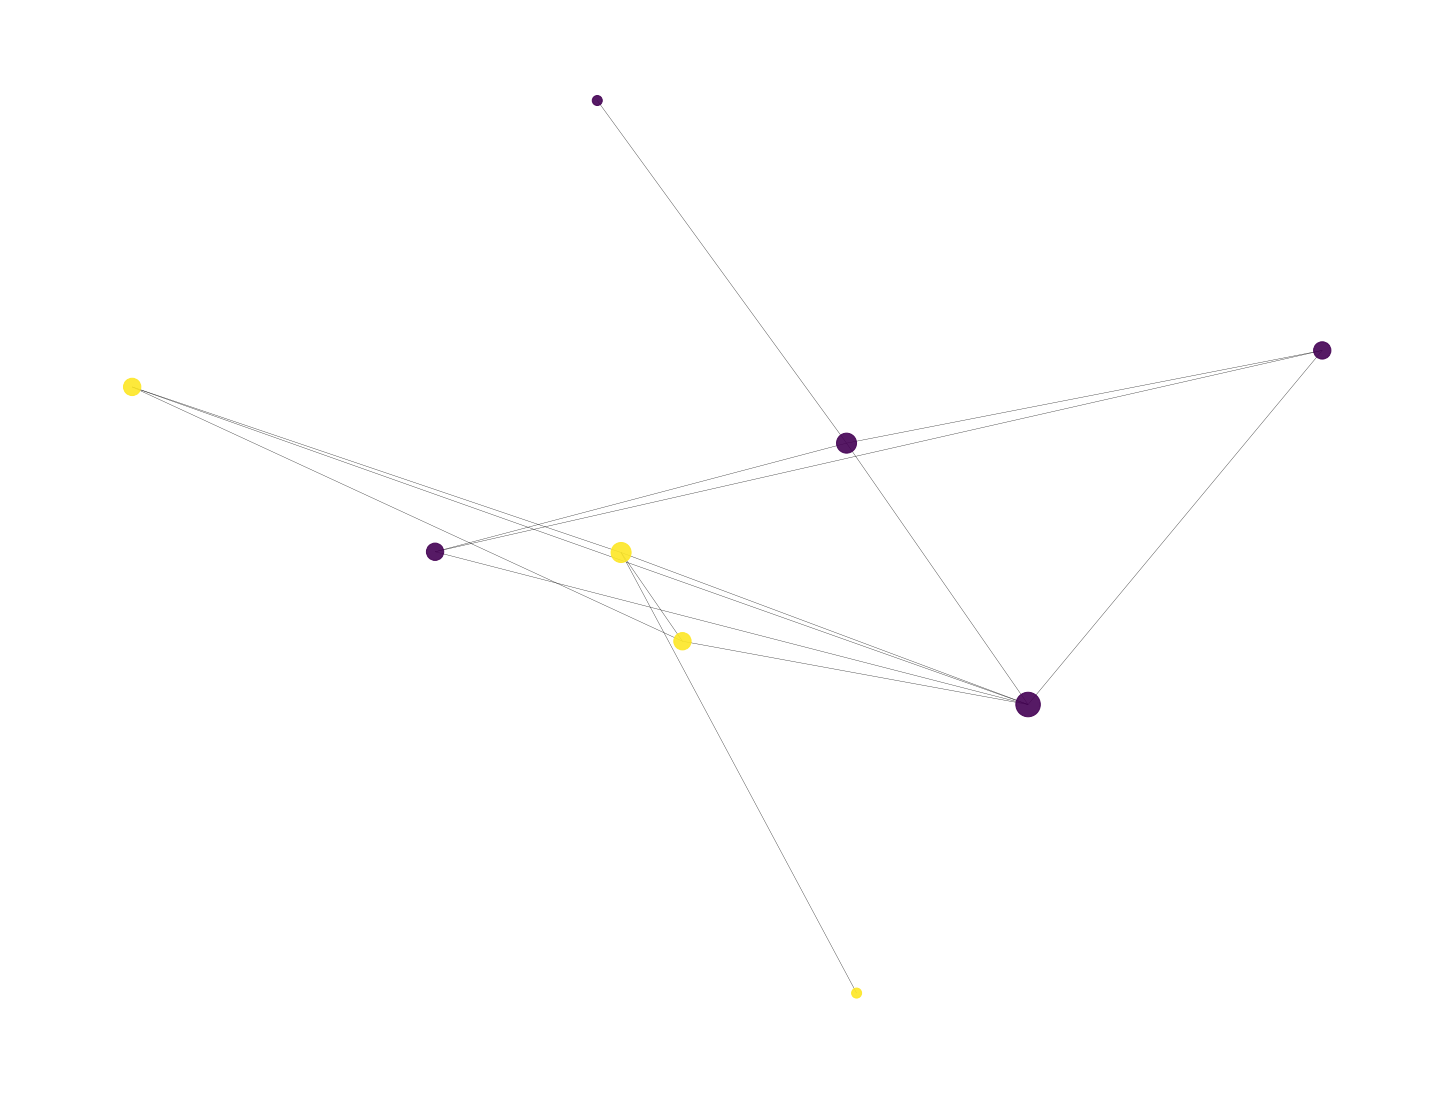

Threshold:  3
- Considering the GCC of the Beatles Network, it has 70 number of nodes and 117 number of links.
Number of communities found:  8
The modularity value is: 0.723
The distribution of the community sizes


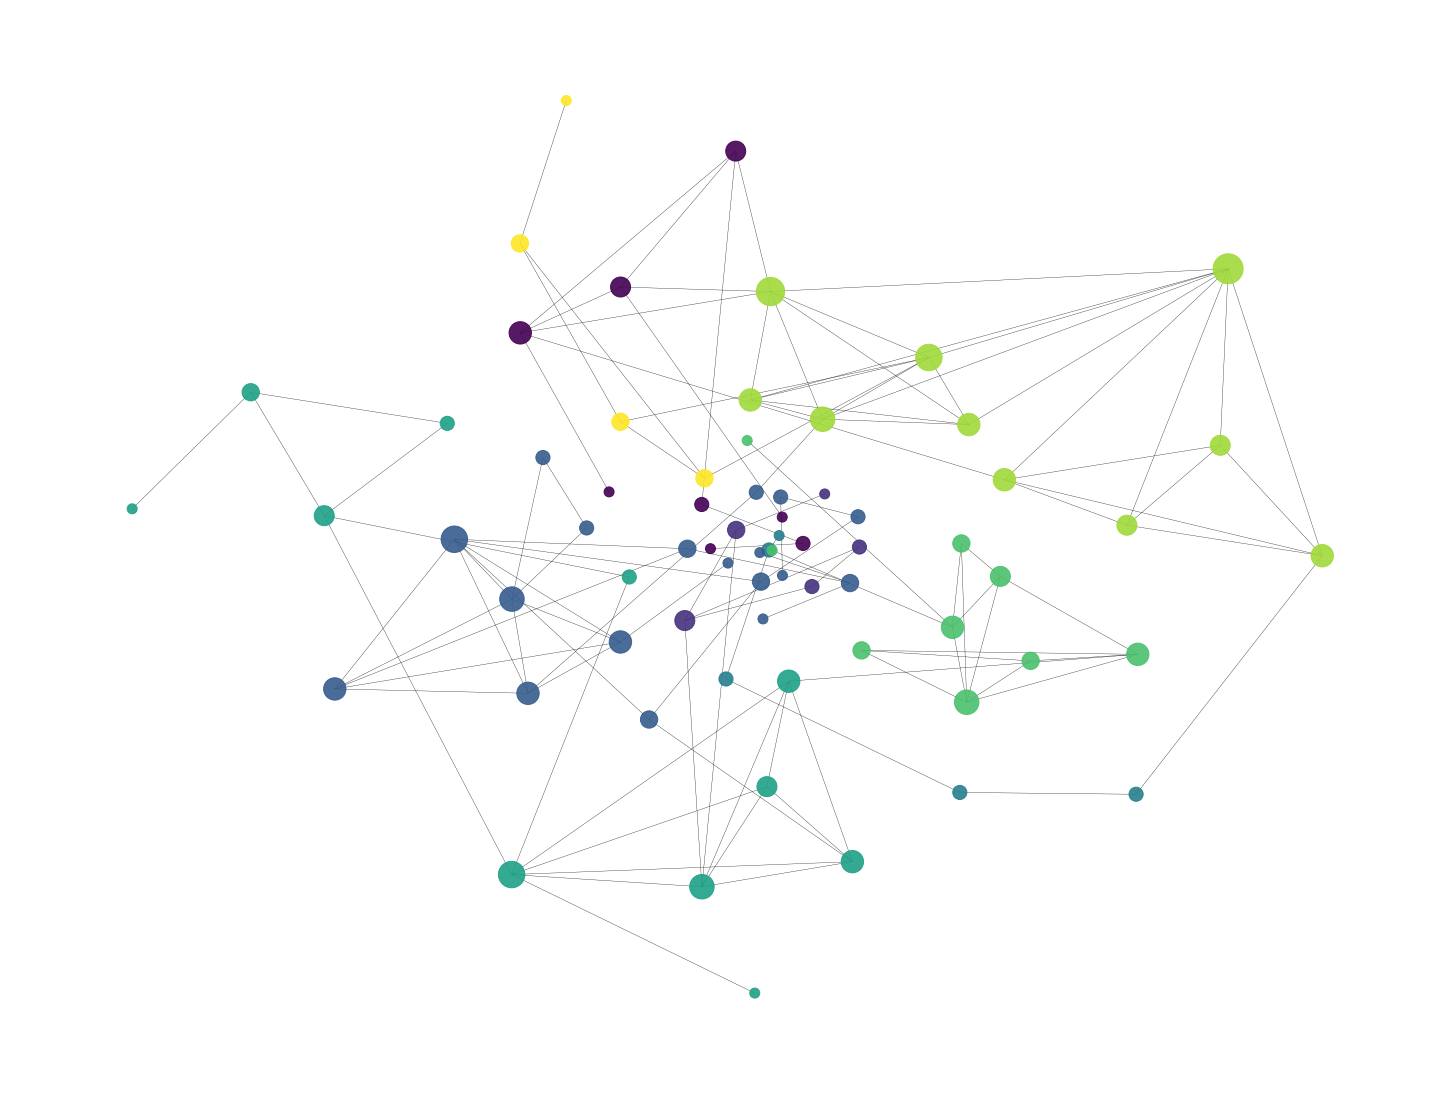

Threshold:  4
- Considering the GCC of the Beatles Network, it has 132 number of nodes and 296 number of links.
Number of communities found:  12
The modularity value is: 0.697
The distribution of the community sizes


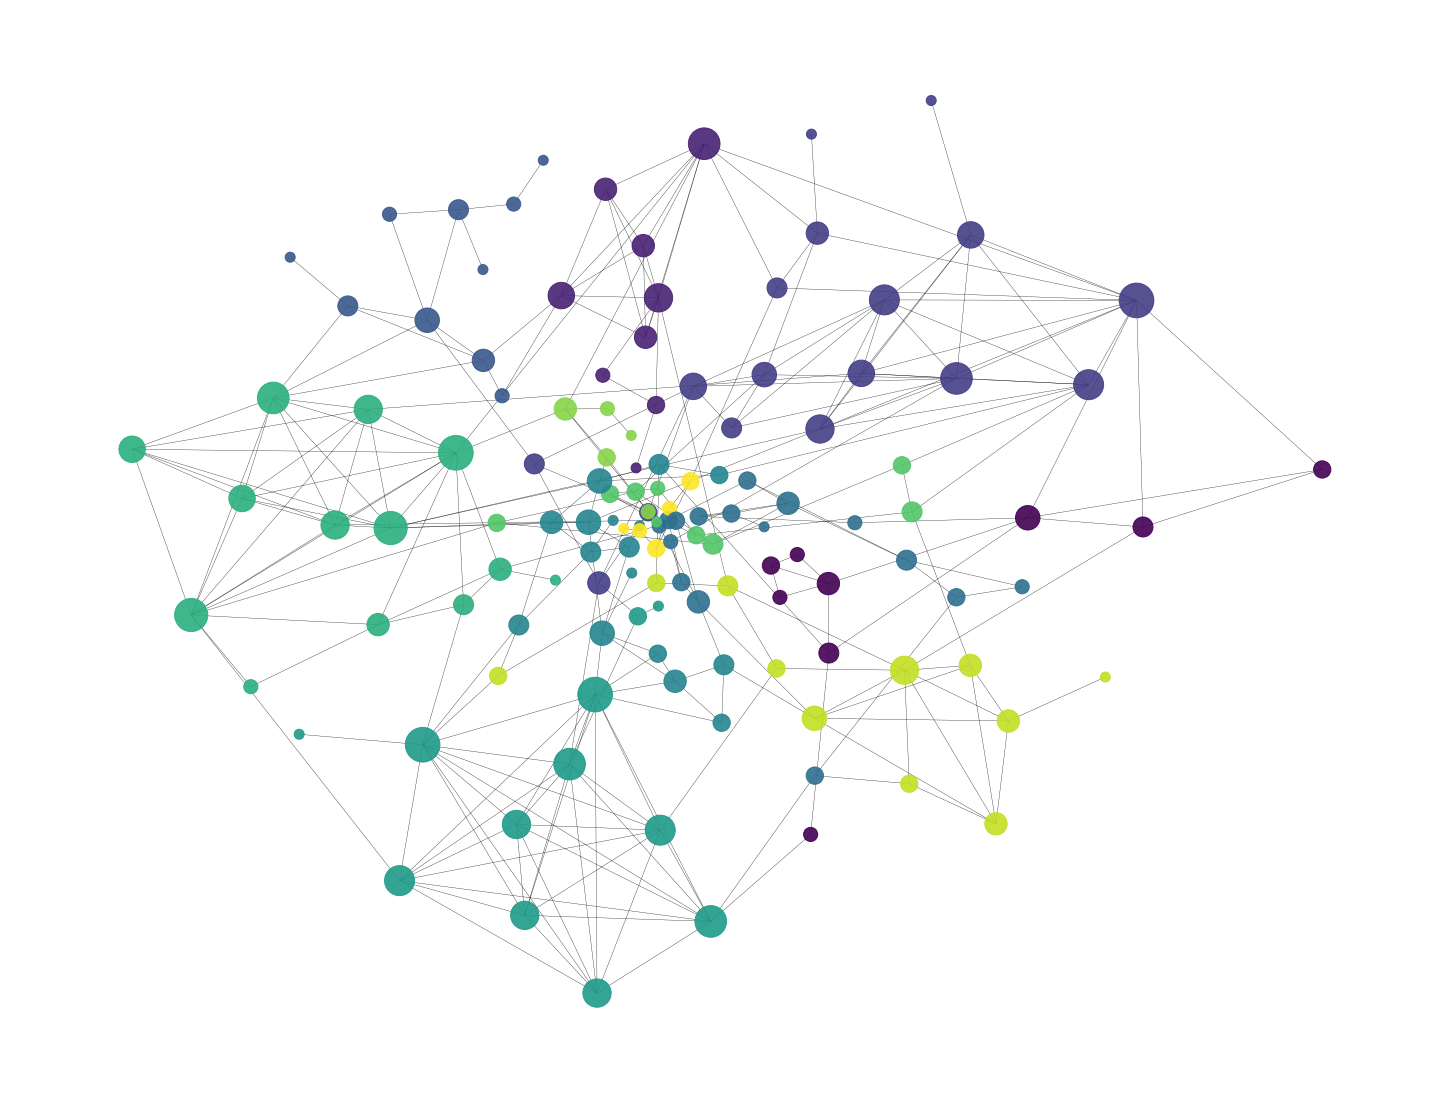

Threshold:  5
- Considering the GCC of the Beatles Network, it has 174 number of nodes and 482 number of links.
Number of communities found:  11
The modularity value is: 0.598
The distribution of the community sizes


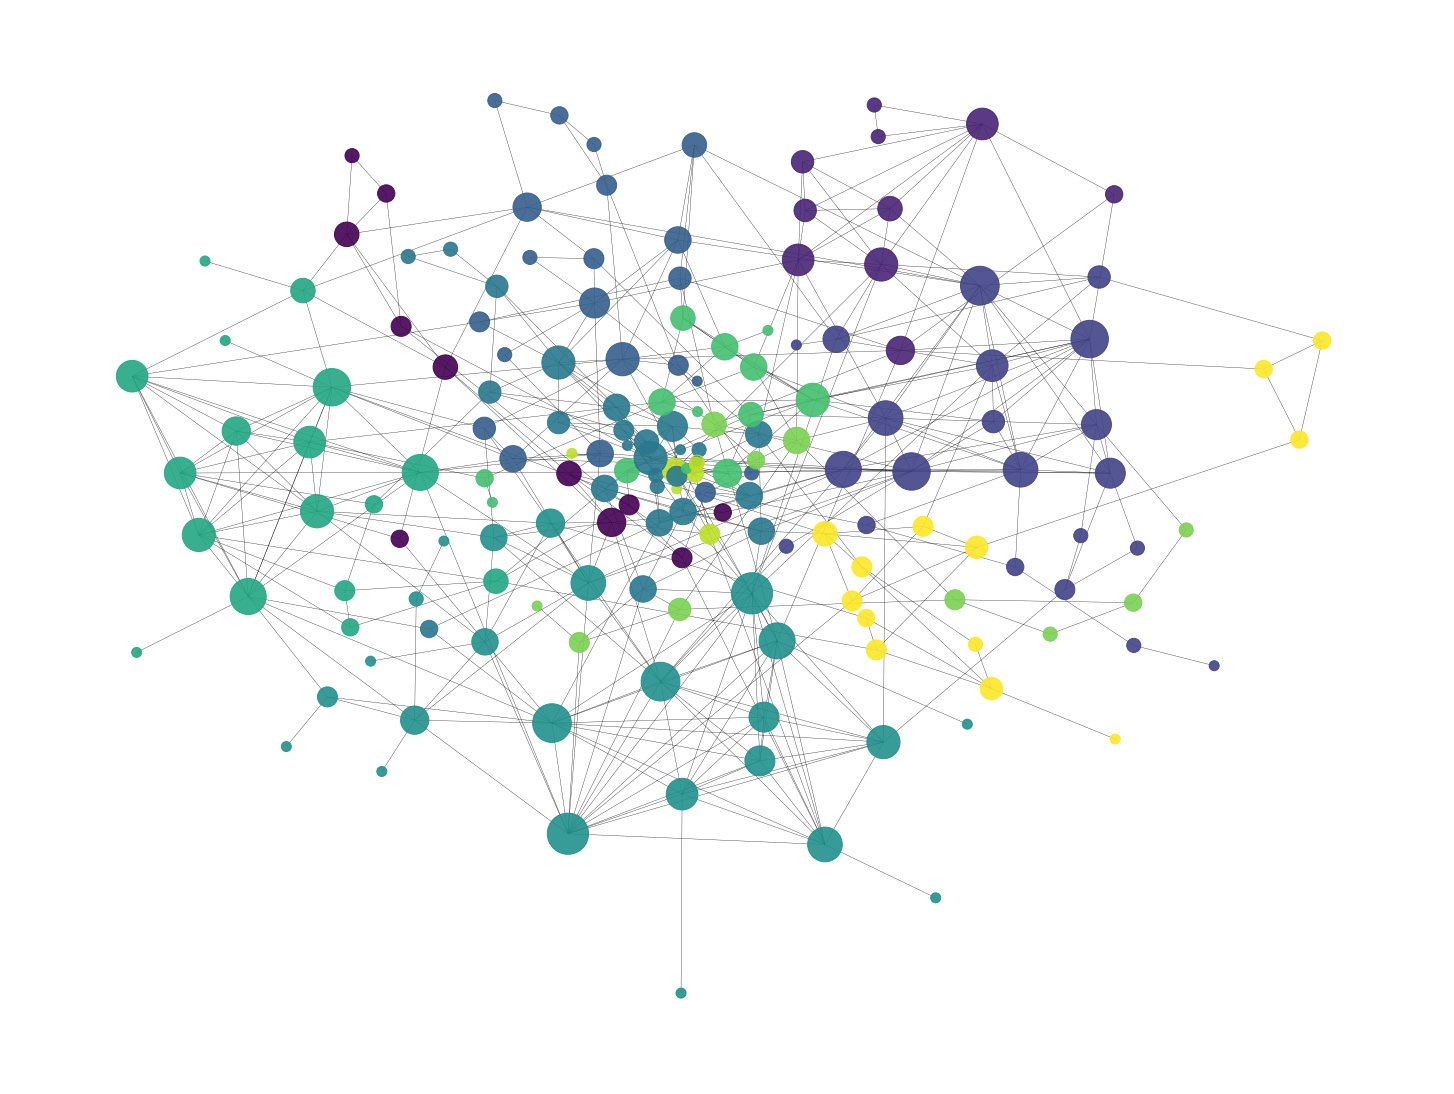

Threshold:  6
- Considering the GCC of the Beatles Network, it has 184 number of nodes and 695 number of links.
Number of communities found:  9
The modularity value is: 0.493
The distribution of the community sizes


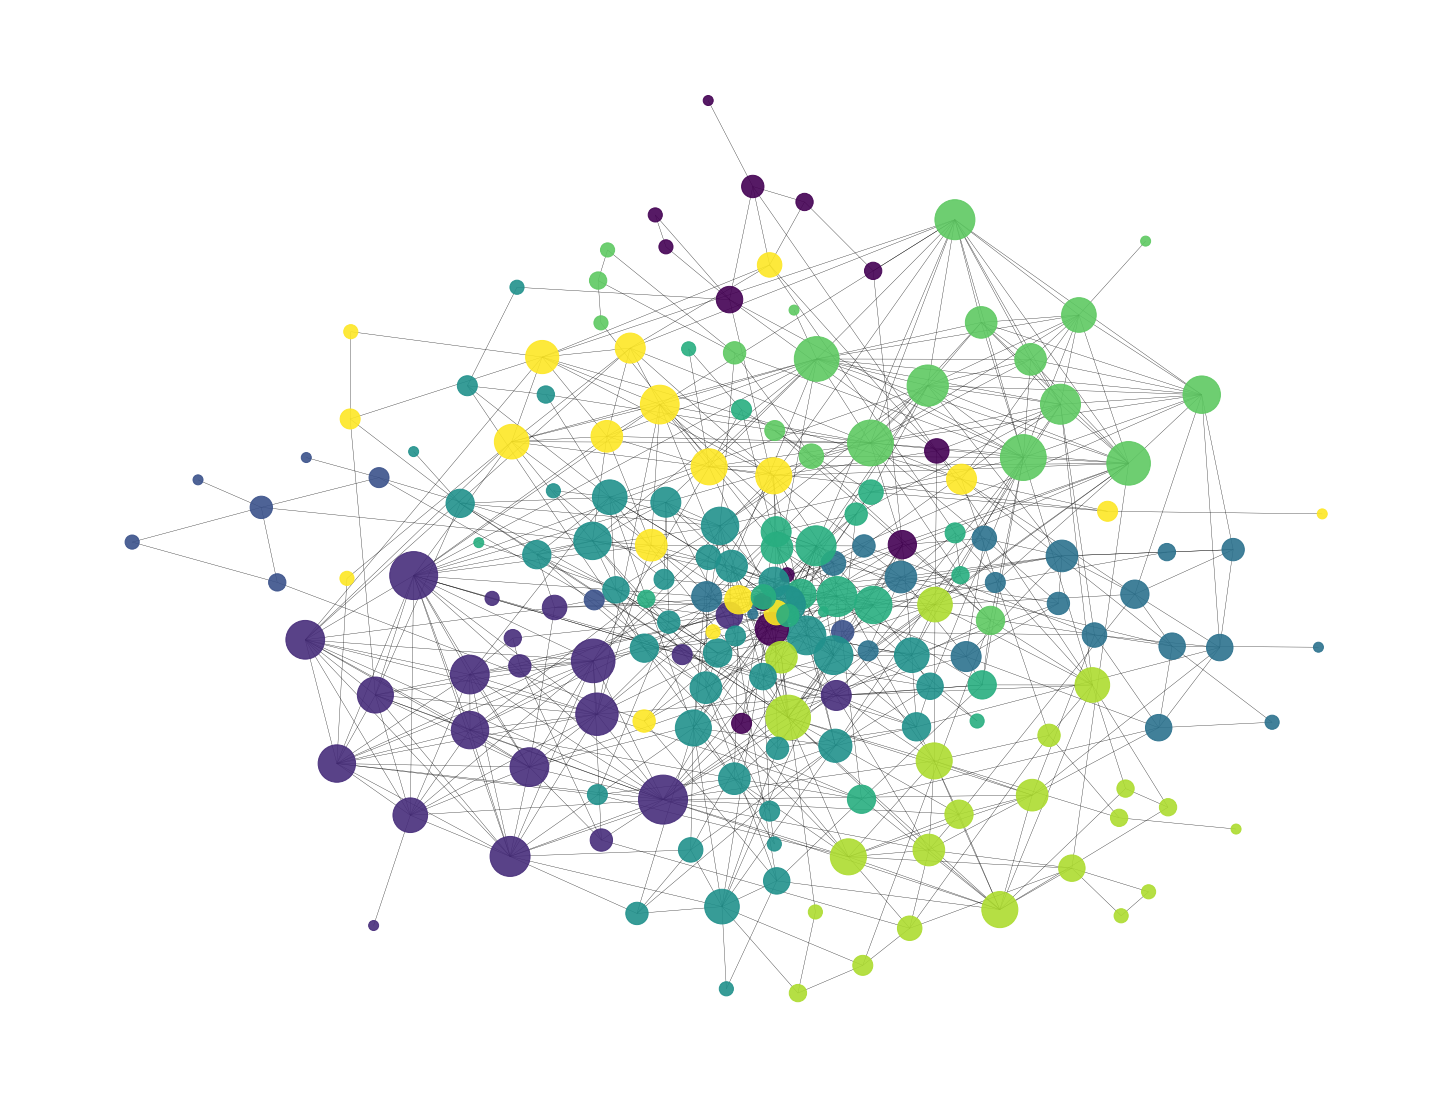

Threshold:  7
- Considering the GCC of the Beatles Network, it has 189 number of nodes and 953 number of links.
Number of communities found:  9
The modularity value is: 0.445
The distribution of the community sizes


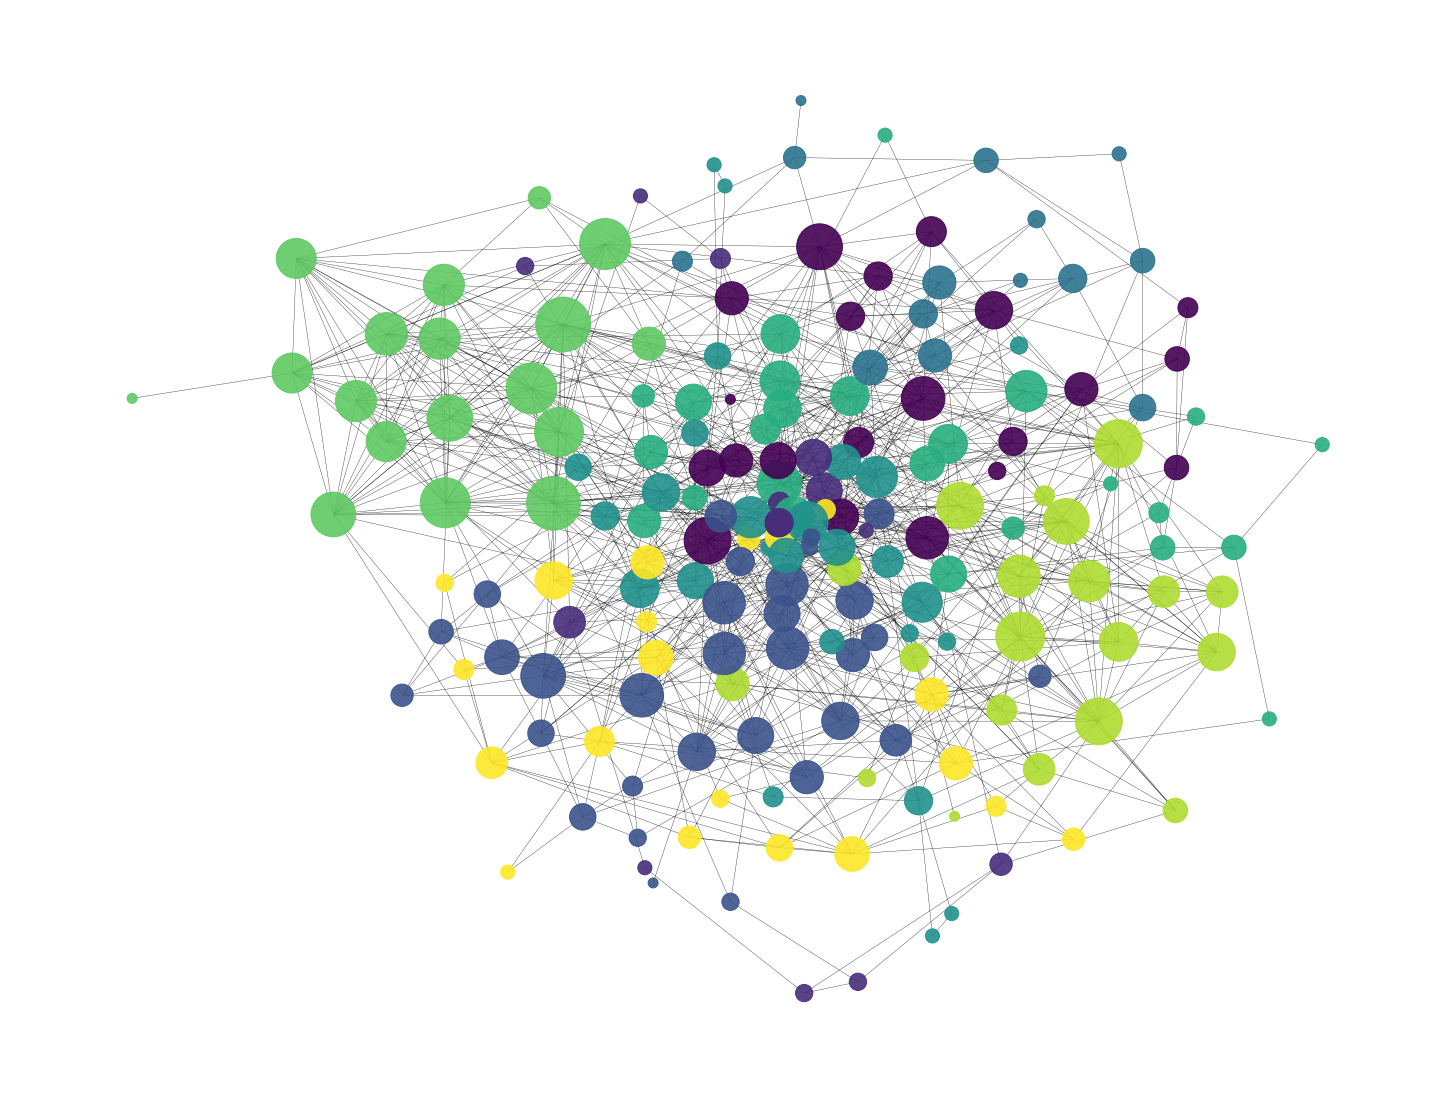

Threshold:  8
- Considering the GCC of the Beatles Network, it has 193 number of nodes and 1248 number of links.
Number of communities found:  7
The modularity value is: 0.361
The distribution of the community sizes


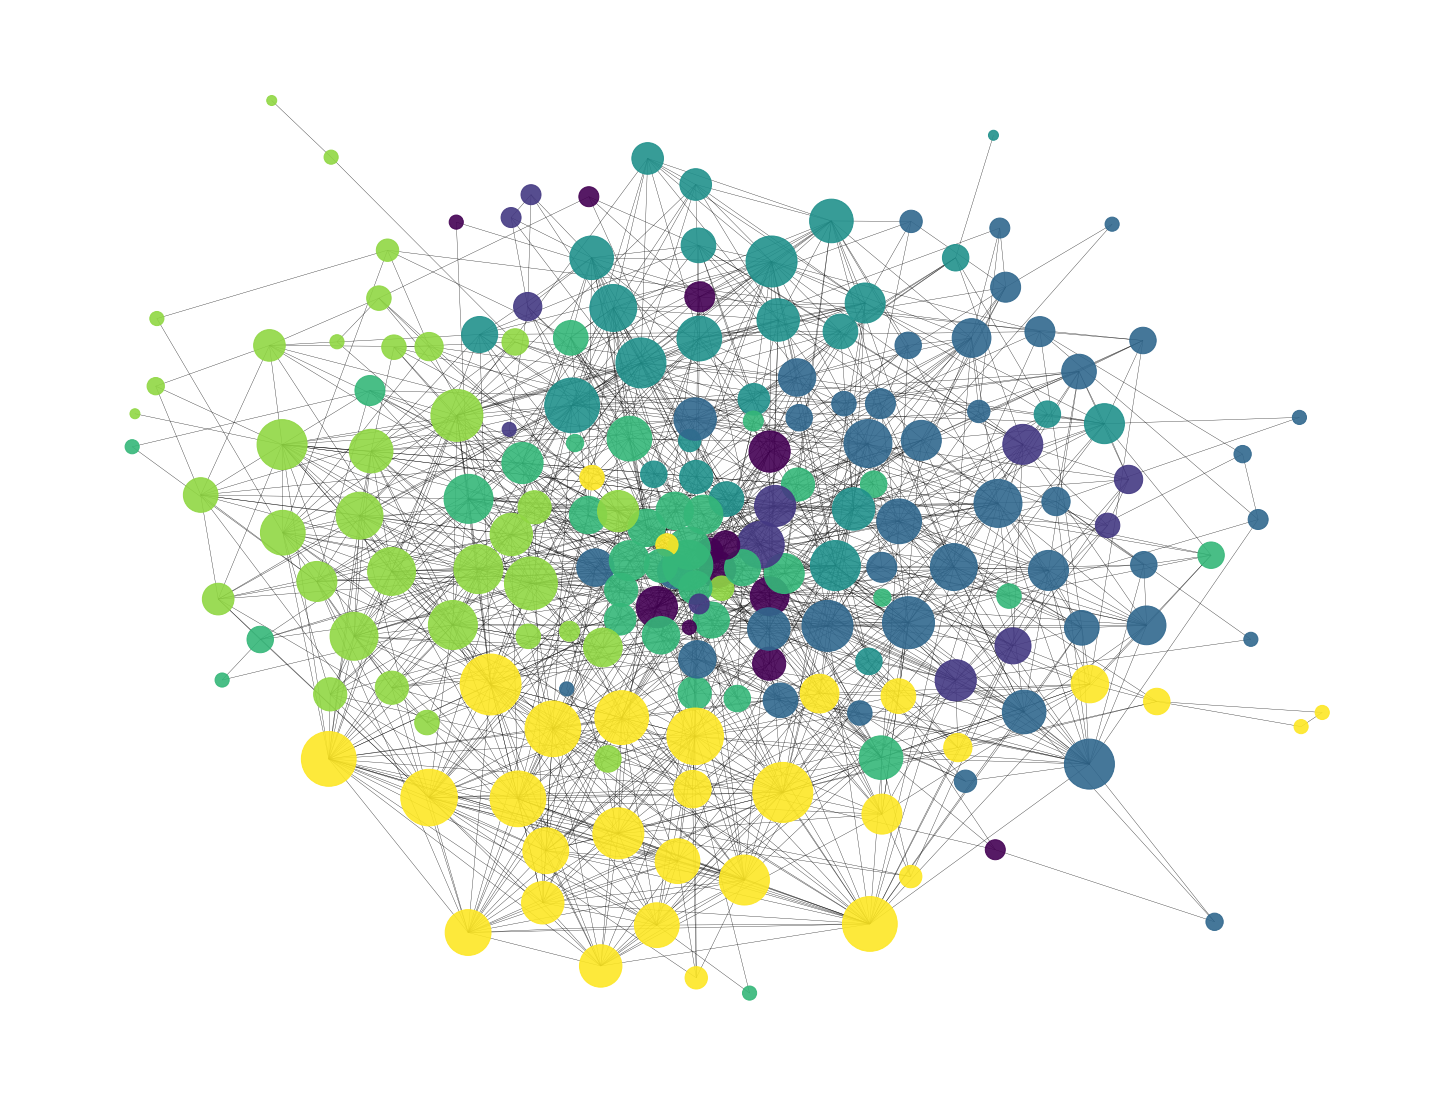

Threshold:  9
- Considering the GCC of the Beatles Network, it has 195 number of nodes and 1528 number of links.
Number of communities found:  7
The modularity value is: 0.319
The distribution of the community sizes


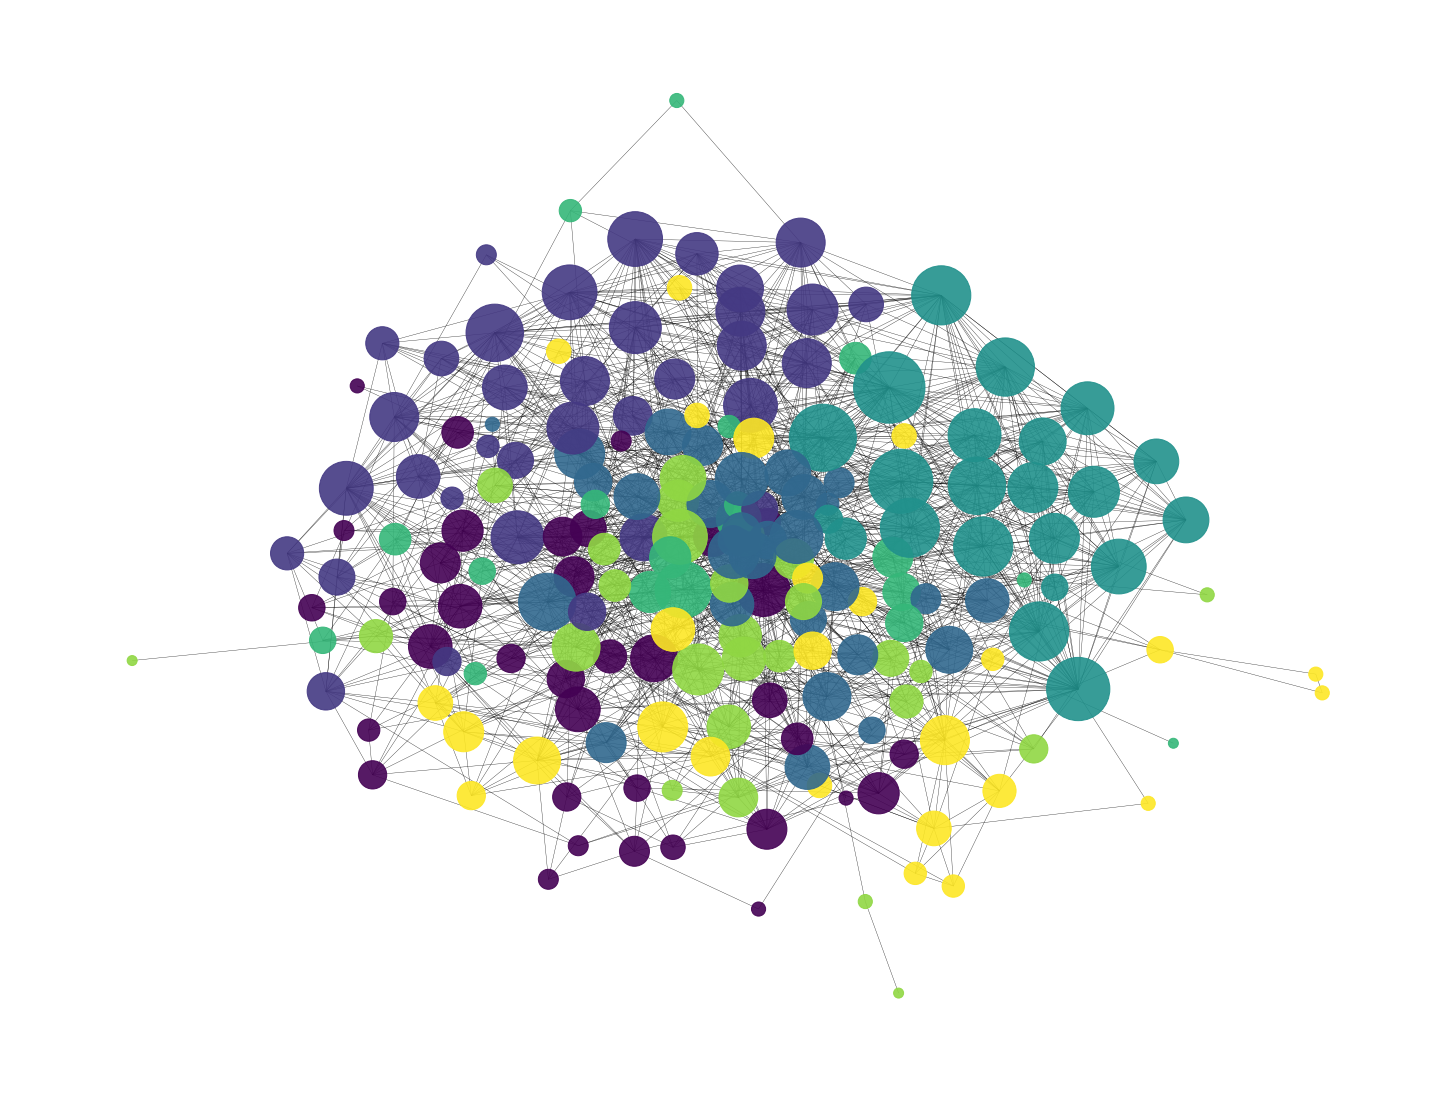

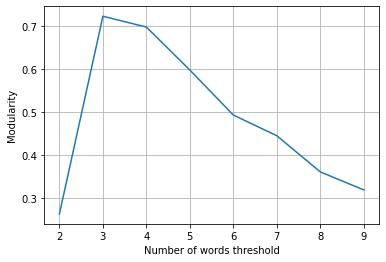

In [16]:
modularities=[]
for i in range(2,10):
    print('Threshold: ',i)
    tc_idf_top={}
    for el in tc_idf_dict:
        tc_idf_top[el]=[word[0] for word in tc_idf_dict[el][-i:]]
    hyperlinks=create_hyperlinks(lyrics_files,tc_idf_top)
    nw=build_network(lyrics_files,hyperlinks)
    GCC=extract_GCC(nw)
    # Compute the best partition. We need to take into account the undirected graph. 
    un_Beatles_nw= GCC.to_undirected()
    partition = community.community_louvain.best_partition(un_Beatles_nw)
    print('Number of communities found: ', len(np.unique(list(partition.values()))))
    mod = community.community_louvain.modularity(partition, un_Beatles_nw)
    print("The modularity value is:","{:.3f}".format(mod))
    modularities.append(mod)
    node_community = [node[1] for node in partition.items()]
    pCol = {i: list(np.random.random(size=3)) for i in set(node_community)}
    plt.figure(figsize=(20, 10))
    forceatlas2 = ForceAtlas2(
                            # Behavior alternatives
                            outboundAttractionDistribution=False,  # Dissuade hubs
                            linLogMode=False,  # NOT IMPLEMENTED
                            adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                            edgeWeightInfluence=2.0,

                            # Performance
                            jitterTolerance=1.0,  # Tolerance
                            barnesHutOptimize=True,
                            barnesHutTheta=1.2,
                            multiThreaded=False,  # NOT IMPLEMENTED

                            # Tuning
                            scalingRatio=0.1,
                            strongGravityMode=False,
                            gravity=10.0,

                            # Log
                            verbose=False)

    positions = forceatlas2.forceatlas2_networkx_layout(un_Beatles_nw, pos=None, iterations=2000)
    f = dict(nx.degree(un_Beatles_nw))
    node_sizes = [v*100 for v in f.values()]
    print("The distribution of the community sizes")
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    fig = plt.gcf()
    nx.draw(un_Beatles_nw, positions, node_size=node_sizes, with_labels=False, width = 0.35, node_color=list(partition.values()), alpha=0.9)
    fig.set_size_inches(20, 15)
    # plt.savefig('fignet'+str(i))
    plt.show()
        
plt.plot(list(range(2,10)),modularities)
plt.xlabel('Number of words threshold')
plt.ylabel('Modularity')
plt.grid()

Let's consider we put the threshold at 5

In [17]:
tc_idf_top={}
for el in tc_idf_dict:
    tc_idf_top[el]=[word[0] for word in tc_idf_dict[el][-5:]]
hyperlinks=create_hyperlinks(lyrics_files,tc_idf_top)
nw=build_network(lyrics_files,hyperlinks)
GCC=extract_GCC(nw)
# Compute the best partition. We need to take into account the undirected graph. 
un_Beatles_nw= GCC.to_undirected()

- Considering the GCC of the Beatles Network, it has 174 number of nodes and 482 number of links.


####  <font color='darkblue'>Part 3.2: Statistical Analysis of the Network: In-degree and Out-degree Distributions. 

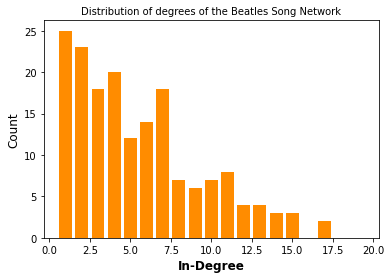

In [40]:
#Bar plot of the in-degree distribution
degrees = sorted(GCC.degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
degrees_dist = [tuples[1] for tuples in degrees]
v1 = np.arange(int(min(degrees_dist )),int(max(degrees_dist))+4,1)

fig1 = plt.gcf()
count1,bins1=np.histogram(degrees_dist ,bins=v1)
plt.bar(bins1[:-1], count1,color='darkorange')
plt.title('Distribution of degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12)
# plt.savefig("Total_degree.png")
plt.show()

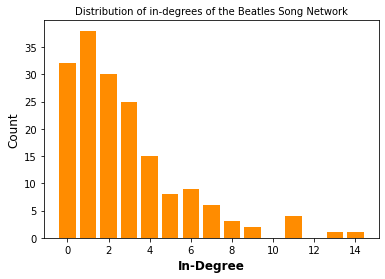

In [46]:
#Bar plot of the in-degree distribution
in_degrees = sorted(GCC.in_degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
in_degrees_dist = [tuples[1] for tuples in in_degrees]
v1 = np.arange(int(min(in_degrees_dist )),int(max(in_degrees_dist)+2),1)

fig1 = plt.gcf()
count1,bins1=np.histogram(in_degrees_dist ,bins=v1)
plt.bar(bins1[:-1], count1,color='darkorange')
plt.title('Distribution of in-degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12)
# plt.savefig("In_degree.png")
plt.show()

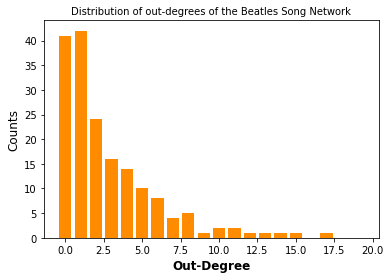

In [49]:
#Bar plot of the out-degree distribution
out_degrees = sorted(GCC.out_degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
out_degrees_dist = [tuples[1] for tuples in out_degrees]

fig2 = plt.gcf()
v2 = np.arange(int(min(out_degrees_dist)),int(max(out_degrees_dist)+4),1)
count2,bins2=np.histogram(out_degrees_dist,bins=v2)
plt.bar(bins2[:-1], count2,color='darkorange')
plt.title('Distribution of out-degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
# plt.savefig("Out_degree.png")
plt.show()

###  <font color='darkblue'>Part 4: Find Communities

##  <font color='darkblue'> Sentimental analysis of communities

In [107]:
# Compute the best partition. We need to take into account the undirected graph. 
un_Beatles_nw= GCC.to_undirected()
while len(np.unique(list(partition.values())))>9:
    partition = community.community_louvain.best_partition(un_Beatles_nw)

print('Number of communities found: ', len(np.unique(list(partition.values()))))

Number of communities found:  9


In [108]:
mod = community.community_louvain.modularity(partition, un_Beatles_nw)
print("The modularity value is:","{:.3f}".format(mod))

The modularity value is: 0.595


Compute the number of songs in every community

In [110]:
# We compute the number of songs in every community
#communities_d stores the group of songs in the same community
communities_d=dict.fromkeys(list(range(0,len(np.unique(list(partition.values()))))))
for i in range(0,len(np.unique(list(partition.values())))):
    l=[]
    for el in partition:
        if partition[el]==i:
            l.append(el)
    communities_d[i]=l
    
size_communities=[len(x) for x in communities_d.values()]

size_communities #number of songs in each community

[21, 26, 4, 21, 30, 22, 8, 13, 29]

Let's name every community for the song with highest degree

In [112]:
communities_named={}
for el in communities_d:
    degrees=[un_Beatles_nw.degree(song) for song in communities_d[el]]
    # pick the maximum degree and rename the community by the max degree name
    communities_named[communities_d[el][degrees.index(max(degrees))]]=communities_d[el]

####  <font color='darkblue'>Visualize Communities:

In [137]:
node_community = [node[1] for node in partition.items()]
pCol = {i: list(np.random.random(size=3)) for i in set(node_community)}

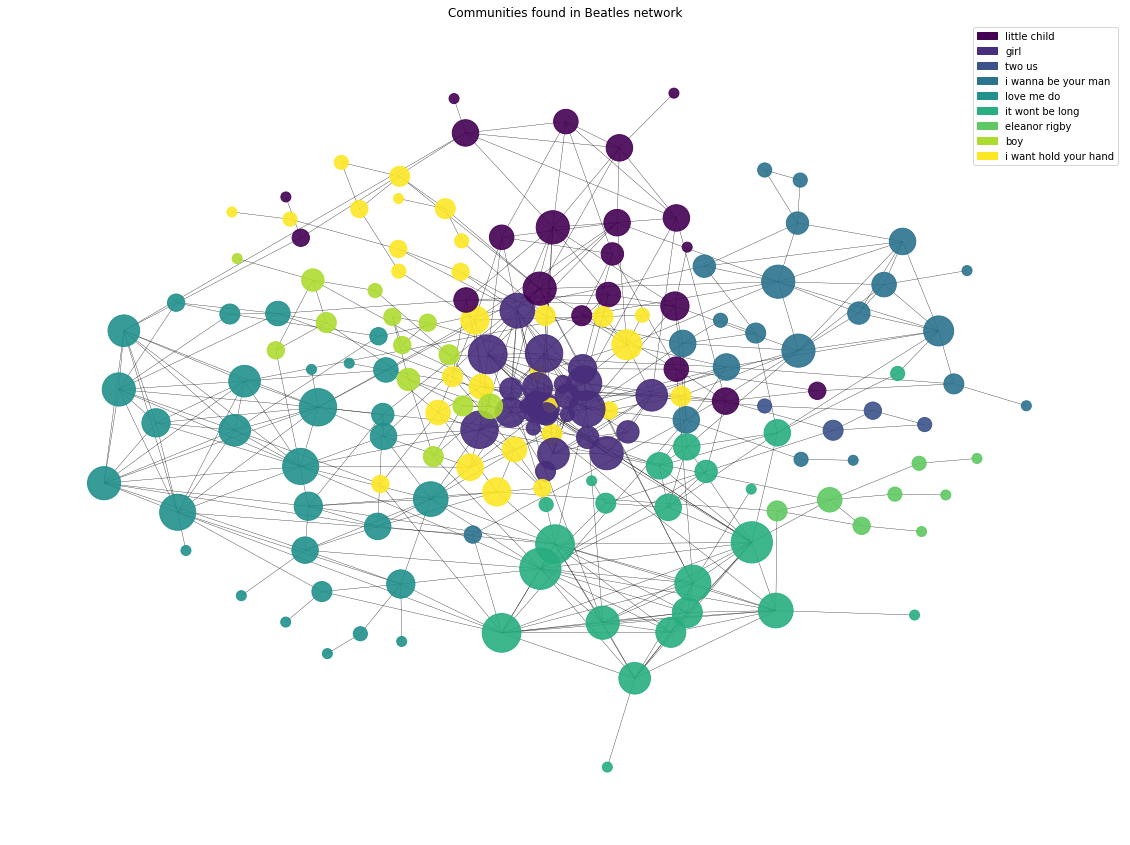

In [142]:
plt.figure(figsize=(30, 15))
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        # Log
                        verbose=False)

positions = forceatlas2.forceatlas2_networkx_layout(un_Beatles_nw, pos=None, iterations=2000)
f = dict(nx.degree(un_Beatles_nw))
node_sizes = [v*100 for v in f.values()]
plt.title('Communities found in Beatles network')
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
fig = plt.gcf()
nx.draw(un_Beatles_nw, positions, node_size=node_sizes, with_labels=False, width = 0.35, node_color=list(partition.values()), alpha=0.9)
# add legend
legend=[]
for idx,el in enumerate(cmap.colors):
    legend.append(mpatches.Patch(color=cmap.colors[idx], label=list(communities_named)[idx]))
plt.legend(handles=legend)
fig.set_size_inches(20, 15)

<font color='darkblue'> Next, we extract the **most common words** in each community. 
    
    
- <font color='darkblue'> First, counting the number of times a word appears in each song of the community. 

In [ ]:
for idx in communities_named:
    community_words=[]
    for el in communities_named[idx]:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        for word in clean:
            community_words.append(word)
    print(idx,': ', FreqDist(community_words).most_common(5))

- <font color='darkblue'> Second, counting in how many songs of the community a word appear.  Below, a function is created for that purpose. 

In [ ]:
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    print('size:' ,size_communities[idx])
    print(FreqDist(community_words).most_common(5))

In [ ]:
def community_words(community):
    community_words=[]
    for el in community:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    return FreqDist(community_words).most_common(5)

community_words(communities_d[0])

<font color='darkblue'> We were also interested in analyzing **in which community** the most famous songs belong.

In [ ]:
def song_community(song):
    i=0
    for idx in communities_d:
        if song in communities_d[i]:
            return i
        i+=1
        
song_community('let it be')
community_words(communities_d[song_community('let it be')])

###  <font color='darkblue'>Part 5: LABMT Sentimental Analysis

**LabMT method**. To compute the sentimental analysis for each community, LabMT method will be used when dealing with cleaned lyrics that just contains the most important and characteristic words for each song.

In [ ]:
%matplotlib auto
labMT = pd.read_csv('labMIT.csv',sep=';')
wordsLabMT = {}
for word,score in zip(labMT['word'],labMT['happiness_average']):
    wordsLabMT[word]=score

To compute the sentimental analysis by using labMT we need to lemmatize, set to lower case, and tokenize the words so they will not used be twice. In clean lyrics, this process has already been implemented.

In [ ]:
def analysis_labMT_cleaned_song(song):
    cleaned=clean_lyrics('lyrics_songs/'+song+'.txt')
    words=list(set(cleaned).intersection(list(wordsLabMT.keys())))
    score=np.mean([wordsLabMT[word] for word in words])
    return score

In [ ]:
analysis_labMT_cleaned_song('yesterday')

In [ ]:
for comm in communities_named:
    print(comm, np.mean([analysis_labMT_cleaned_song(song.replace(' ','-')) for song in communities_named[comm]]))

We aim to do a scatter plot now where the x-axis will correspond to the year, and the y-axis to the mean labMT value. Also each community will be represented with a specific colour. To achieve data we need a dataframe with the name of the song, the year, the labMT value and the community it belongs to.

In [ ]:
# function to return key for any value
def get_key(val):
    for key, value in communities_d.items():
        if val in value:
            return int(key)

# if get key is None means that the song does not belong to the GCC, and therefore to any community

Including the songs out from the GCC and therefore the ones which do not belong to any community

In [ ]:
Song_data=pd.read_csv('Songs_Sorted_Years.csv')
Lyrics_Data=pd.DataFrame({'Song':lyrics_files})
Lyrics_Data['Year']=[int(Song_data[Song_data['Song']==title]['Year']) for title in Lyrics_Data['Song']]
Lyrics_Data['LabMT']=[analysis_labMT_cleaned_song(title) for title in Lyrics_Data['Song']]
Lyrics_Data['Community']=[get_key(title.replace('-',' ')) for title in Lyrics_Data['Song']]
Lyrics_Data.head()

Including just the songs that are in the GCC

In [ ]:
lyrics_GCC=list(GCC.nodes)
Song_data=pd.read_csv('Songs_Sorted_Years.csv')
Lyrics_Data=pd.DataFrame({'Song':lyrics_GCC})
Lyrics_Data['Year']=[int(Song_data[Song_data['Song']==title.replace(' ','-')]['Year']) for title in Lyrics_Data['Song']]
Lyrics_Data['LabMT']=[analysis_labMT_cleaned_song(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data['Community']=[get_key(title) for title in Lyrics_Data['Song']]
Lyrics_Data

In [ ]:
Lyrics_Data[Lyrics_Data['LabMT']==max(Lyrics_Data['LabMT'])]

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=Lyrics_Data, x="Year", y="LabMT",hue="Community")
plt.show()

In [ ]:
Lyrics_Data_Golden_Decade=Lyrics_Data[Lyrics_Data['Year']<1975]
Lyrics_Data_Golden_Decade

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=Lyrics_Data_Golden_Decade, x="Year", y="LabMT",hue="Community")
sns.lineplot(data=Lyrics_Data_Golden_Decade, x="Year", y="LabMT") # show mean and 95% confidence interval
plt.legend(title='Community')
plt.title('Evolution of songs by year according to LabMT average values')
plt.show()

In [ ]:
from bokeh.plotting import figure, output_file, show

# output to static HTML file
output_file("line.html")

p = figure(width=1000, height=750)

# add a circle renderer with a size, color, and alpha
p.circle(Lyrics_Data_Golden_Decade['Year'], Lyrics_Data_Golden_Decade['LabMT'], size=10, color="navy", alpha=0.5)

# show the results
show(p)

###  <font color='darkblue'>Part 6: VADER Sentimental Analysis

Maybe an analysis with VADER makes more sense, due to the mood of the songs usually resides in how the sentence is written and not just in single words.

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_score_VADER(sentence):
    sentiment_dict = analyzer.polarity_scores(sentence)
    return sentiment_dict['compound']

def analysis_VADER_cleaned_song(song):
    song=open('lyrics_songs/'+song+'.txt').read()
    index=[(m.start(0), m.end(0)) for m in re.finditer('  ', song)]
    sentences=[]
    i=0
    for el in index:
        sentences.append(song[i:el[0]])
        i=el[1]
    return np.mean([sentiment_score_VADER(el) for el in sentences])


In [ ]:
Lyrics_Data['VADER']=[analysis_VADER_cleaned_song(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data

In [ ]:
Lyrics_Data_Golden_Decade=Lyrics_Data[Lyrics_Data['Year']<1975]
Lyrics_Data_Golden_Decade

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Lyrics_Data_Golden_Decade, x="Year", y="VADER",hue="Community")
sns.lineplot(data=Lyrics_Data_Golden_Decade, x="Year", y="VADER") # show mean and 95% confidence interval
plt.legend(title='Community')
plt.title('Evolution of songs by year according to VADER average values')
plt.show()

### Most recurrent topics over time

In [ ]:
def top5_song(song):
    return FreqDist(clean_lyrics('lyrics_songs/'+song.replace(' ','-')+'.txt')).most_common(5)

def common_words(songs_list):
    total_words=[]
    for el in songs_list:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        # unique=list(np.unique(clean))
        for word in clean:
            total_words.append(word)
    return FreqDist(total_words).most_common(5)

common_words(list(Lyrics_Data[Lyrics_Data['Year']==1962]['Song']))

In [ ]:
d=[]
for year in range(1962,1971):
    for el in common_words(list(Lyrics_Data[Lyrics_Data['Year']==year]['Song'])):
        d.append([el[0],year,el[1]])
comm_words_df=pd.DataFrame(d)
comm_words_df=comm_words_df.rename(columns={0:'Word',1: "Year", 2: "Freq"})

Now we aim to save the average labMT value of the songs that include each specific word per year

In [ ]:
labMT_values=[]
for year in range(1962,1971):
    for word in list(comm_words_df[comm_words_df['Year']==year]['Word']):
        avg_labMT=[]
        for song in list(Lyrics_Data[Lyrics_Data['Year']==year]['Song']):
            if word in [el[0] for el in top5_song(song)]:
                avg_labMT.append(analysis_labMT_cleaned_song(song.replace(' ','-')))
        labMT_values.append(np.mean(avg_labMT))
comm_words_df['labMT value']=labMT_values
comm_words_df.head()

Plot of freq of the 5 most common words per year by showing the label

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(comm_words_df.Year,comm_words_df.Freq)
i=0
for x,y in zip(comm_words_df.Year,comm_words_df.Freq):
    
    label=comm_words_df.Word[i]
    i+=1
    plt.annotate(label,
                (x,y),
                textcoords='offset points',
                xytext=(0,10),
                ha='center')

In [ ]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show

output_file("label.html", title="label.py example")

source = ColumnDataSource(data=dict(year=list(comm_words_df.Year),
                                    freq=list(comm_words_df.Freq),
                                    names=list(comm_words_df.Word)))

p = figure(title='Dist. of 10th Grade Students at Lee High',
          x_range=Range1d(1961, 1972))
p.scatter(x='year', y='freq', size=8, source=source)
p.xaxis[0].axis_label = 'Weight (lbs)'
p.yaxis[0].axis_label = 'Height (in)'

labels = LabelSet(x='year', y='freq', text='names',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

'''citation = Label(x=70, y=70, x_units='screen', y_units='screen',
                 text='Collected by Luke C. 2016-04-01', render_mode='css',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)
'''
p.add_layout(labels)
# p.add_layout(citation)

show(p)

In [ ]:
# output to static HTML file
output_file("line.html")

p = figure(width=1000, height=750)

# add a circle renderer with a size, color, and alpha
p.circle(comm_words_df['Year'], comm_words_df['Freq'], size=10, color="navy", alpha=0.5)

# show the results
show(p)

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=comm_words_df, x="Year", y="Freq",size='Freq',sizes=(20,200),hue='Year',legend=False)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=comm_words_df, x="Year", y="Freq",size='Freq',sizes=(20,200),legend=False)
plt.show()

How the mood with songs regarding __love__ has been evolving over years

In [ ]:
Lyrics_Data_Golden_Decade.head()

In [ ]:
yes=0
songs_love=[]
for el in Lyrics_Data_Golden_Decade['Song']:
    path='lyrics_songs/'+el.replace(' ','-')+'.txt'
    if 'love' in clean_lyrics(path):
        songs_love.append(el.replace('-',' '))
        yes+=1
yes/len(Lyrics_Data['Song'])

In [ ]:
love_df=Lyrics_Data_Golden_Decade[Lyrics_Data_Golden_Decade['Song'].isin(songs_love)]
love_df

We could add a _hue_ that corresponds to the author if is stored as one of the attributes.

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=love_df, x="Year", y="LabMT",hue="Community")
sns.lineplot(data=love_df, x="Year", y="LabMT") # show mean and 95% confidence interval
plt.legend(title='Community')
plt.title('Evolution of love perspective by year according to LabMT average values')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=love_df, x="Year", y="VADER",hue="Community")
sns.lineplot(data=love_df, x="Year", y="VADER") # show mean and 95% confidence interval
plt.legend(title='Community')
plt.title('Evolution of love perspective by year according to VADER average values')
plt.show()

Let's do a function that creates this two plots depending on the word you want to check how it evolves

In [ ]:
def word_evolution(word):
    # we first store the number of songs that contain this word (Always considering just the Golden decade)
    yes=0
    songs=[]
    for el in Lyrics_Data_Golden_Decade['Song']:
        path='lyrics_songs/'+el.replace(' ','-')+'.txt'
        if word in clean_lyrics(path):
            songs.append(el.replace('-',' '))
            yes+=1
    print('Percentage of songs containing ', word,': ',yes/len(Lyrics_Data['Song']))
    # we store it in a dataframe in order to do the corresponding plots
    word_df=Lyrics_Data_Golden_Decade[Lyrics_Data_Golden_Decade['Song'].isin(songs)]
    plt.figure(figsize=(14, 8))
    plt.subplot(1,2,1)
    sns.scatterplot(data=word_df, x="Year", y="LabMT",hue="Community")
    sns.lineplot(data=word_df, x="Year", y="LabMT") # show mean and 95% confidence interval
    plt.legend(title='Community')
    plt.title('Evolution according to LabMT average values')
    plt.subplot(1,2,2)
    sns.scatterplot(data=word_df, x="Year", y="VADER",hue="Community")
    sns.lineplot(data=word_df, x="Year", y="VADER") # show mean and 95% confidence interval
    plt.legend(title='Community')
    plt.title('Evolution according to VADER average values')
    plt.show()
    
word_evolution('know')

In order to find interesting words let's see which are the most used words in all beatles songs

In [ ]:
total_words_all_songs=[]
for el in Lyrics_Data_Golden_Decade['Song']:
    path='lyrics_songs/'+el.replace(' ','-')+'.txt'
    for word in np.unique(clean_lyrics(path)):
        total_words_all_songs.append(word)

In [ ]:
FreqDist(total_words_all_songs).most_common(5)

In [ ]:
word_evolution('see')

In [ ]:
word_evolution('time')

In [ ]:
word_evolution('like')

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()


In [ ]:
import plotly.express as px
fig = px.scatter(comm_words_df, x="Year", y="Freq", color="Word")
fig.show()

In [ ]:
df = px.data.gapminder()
fig = px.scatter(comm_words_df,x="Year", y="labMT value", size="Freq", color="Word",
                 log_x=True, size_max=60)
fig.show()

In [ ]:
Lyrics_Data

In [ ]:
def clean_title(title):
    remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
                 ' on ',' with ',' off ',' this ',' up ',' like ']
    remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                      'with-']
    remove_list_end=['-by','-to','-on','-is','-that','-before']
    remove_list2=['\'','.','!','(',')',',','/',':','\’','?']

    pattern6='<div class="col-md-6 middle-content border-left border-right"><p>'
    pattern7='<figure class="wp-block-table table-expander table table-imported">'
    try:
        title=title.lower()
        for el in remove_list2: # delete special characters
            title=title.replace(el,'')
        for el in remove_list: # replace single words with a space
            title=title.replace(el,' ')
        title=title.replace(' ','-')
        title=title.replace('--','-')
        # delete words from the start
        for i in range(0,6):
            if title[:i] in remove_list_start:
                title=title[i:]
        # delete words end
        for i in range(0,8):
            if title[-i:] in remove_list_end:
                title=title[:-i]
        if title[0]=='-':
            title=title[1:]
        return title
    except:
        print(title)

In [ ]:
beatles_spotify=pd.read_csv('spotify_beatles.csv')
titles=[]
i=0
for el in beatles_spotify['track_name']:
    try:
        text=el[:re.search('-',el).span()[0]-1]
        text=text.lower()
    except:
        pass
    text=clean_title(text).replace('-',' ')
    # print(text)
    titles.append(text)
    if text in list(Lyrics_Data['Song']):
        # print(text)
        i+=1
print(i)
beatles_spotify['track_name']=titles

In [ ]:
Lyrics_Data2=Lyrics_Data.copy()

# we initialize the columns
for att in beatles_spotify:
        if att not in ['track_number','id','name','uri']:
            Lyrics_Data2[att]=0
# float(Lyrics_Data2.loc[Lyrics_Data2['Song']=='yesterday', 'tempo'])
# beatles_spotify.loc[beatles_spotify['track_name']=='yesterday', 'tempo']
att_list=[]
for att in beatles_spotify:
        if att not in ['track_number','id','name','uri']:
            att_list.append(att)

In [ ]:
att_list=[]
for att in beatles_spotify:
        if att not in ['track_number','id','name','uri']:
            att_list.append(att)
            
for song in Lyrics_Data['Song']:
    try:
        for att in att_list:
            Lyrics_Data2.loc[Lyrics_Data2['Song']==song, att]=beatles_spotify.loc[beatles_spotify['track_name']==song,att].values[0]
    except:
        pass
        # print(song)

In [ ]:
Lyrics_Data2.head()

In [ ]:
Lyrics_Data_Golden_Decade2=Lyrics_Data2[Lyrics_Data['Year']<1975]

In [ ]:
df = px.data.gapminder()
fig = px.scatter(Lyrics_Data_Golden_Decade2,x="Year", y="LabMT", size="danceability", color="album",
                 log_x=True, size_max=60)

In [ ]:
df = px.data.gapminder()
fig = px.scatter(Lyrics_Data_Golden_Decade2,x="Year", y="LabMT", size="danceability", color="Community",
                 log_x=True, size_max=60)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(Lyrics_Data_Golden_Decade2, x="Year", y="LabMT", animation_frame="Community",
           size="duration_ms", color="album",
           log_x=True, size_max=20)
fig.show()